In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('./Titanic.csv')

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: xlabel='Pclass', ylabel='count'>

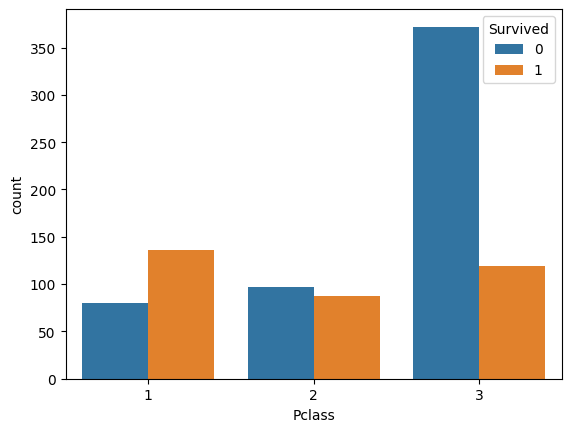

In [7]:
sns.countplot(data,x='Pclass',hue ='Survived')

<Axes: xlabel='Sex', ylabel='count'>

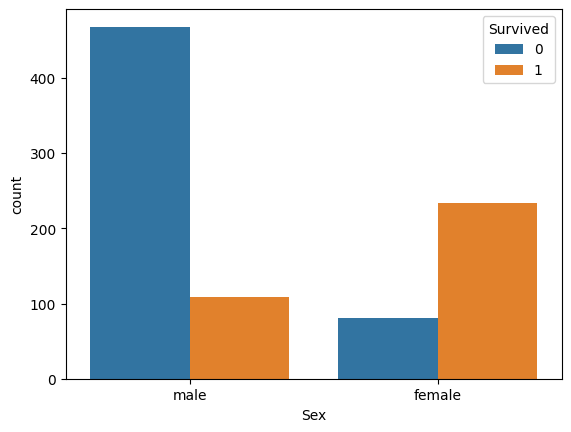

In [8]:
sns.countplot(data,x='Sex',hue ='Survived')

In [9]:
cols_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']

In [10]:
data = data.drop(columns = cols_drop)

In [11]:
# data.head()
pd.unique(data['Embarked'])

array(['S', 'C', 'Q', nan], dtype=object)

In [12]:
lab_enc = LabelEncoder()
data['Sex'] = lab_enc.fit_transform(data['Sex'])
data['Embarked'] = lab_enc.fit_transform(data['Embarked'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [13]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [14]:
data = data.fillna(data['Age'].mean())

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [16]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
output_col = ['Survived']

X_data = data[input_cols]
Y_data = data['Survived']
X_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,22.0,1,0,7.2500,2
1,1,0,38.0,1,0,71.2833,0
2,3,0,26.0,0,0,7.9250,2
3,1,0,35.0,1,0,53.1000,2
4,3,1,35.0,0,0,8.0500,2


In [17]:
print(X_data.shape, Y_data.shape)

(891, 7) (891,)


In [18]:
X_data = X_data.values
Y_data = Y_data.values

In [20]:
x_train,x_test,y_train,y_test = train_test_split(X_data,Y_data,train_size = 0.8,random_state=42)

In [21]:
scale = StandardScaler()
x_train = scale.fit_transform(x_train)
x_test = scale.transform(x_test)

In [22]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [27]:
ypred = clf.predict(x_train)
print(np.sum(ypred == y_train)/y_train.shape[0])
accuracy_score(y_train,clf.predict(x_train))

0.8019662921348315


0.8019662921348315

In [24]:
accuracy_score(y_test,clf.predict(x_test))

0.8100558659217877

In [28]:
xt = np.array([[3,1,20,0,0,50,0]])
xt = scale.transform(xt)
xt

array([[ 0.81303367,  0.7243102 , -0.73453348, -0.47072241, -0.47934164,
         0.33531121, -2.01983093]])

In [29]:
clf.predict(xt)

array([0], dtype=int64)

In [31]:
from sklearn.metrics import confusion_matrix, classification_report,roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
ypred = [1,1,0,0,0,1,0,1,1,1]
yac = [1,0,0,0,1,1,0,1,0,1]

In [33]:
cm = confusion_matrix(yac,ypred)

In [35]:
cm

array([[3, 2],
       [1, 4]], dtype=int64)

<Axes: >

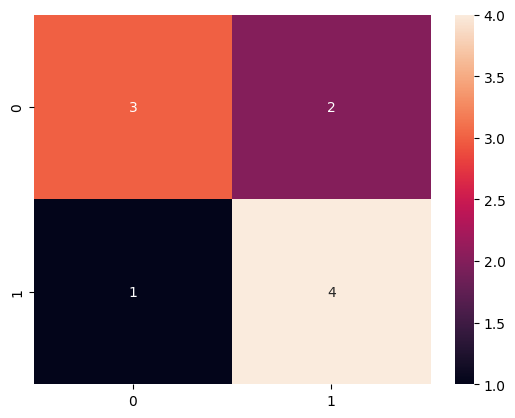

In [34]:
sns.heatmap(cm,annot=True)

<Axes: >

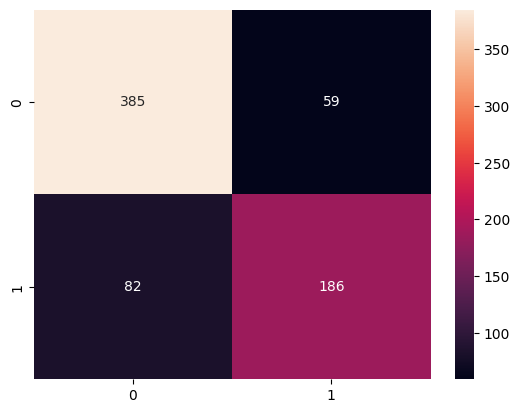

In [36]:
sns.heatmap(confusion_matrix(y_train,clf.predict(x_train)),annot = True,fmt='g')

In [38]:
print(classification_report(yac,ypred))

              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



In [39]:
print(classification_report(y_train,clf.predict(x_train)))

              precision    recall  f1-score   support

           0       0.82      0.87      0.85       444
           1       0.76      0.69      0.73       268

    accuracy                           0.80       712
   macro avg       0.79      0.78      0.79       712
weighted avg       0.80      0.80      0.80       712



In [65]:
fpr,tpr,_ = roc_curve(y_train,clf.predict_proba(x_train)[:,0],pos_label=0)

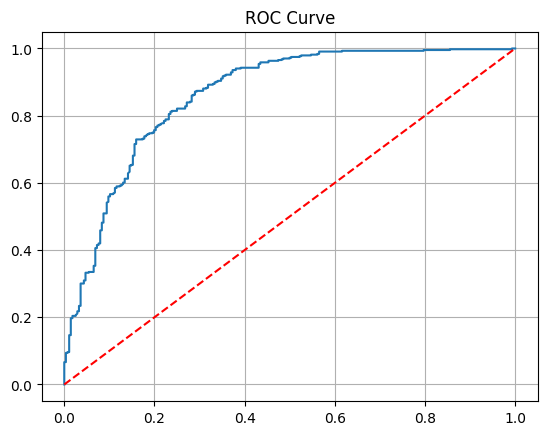

In [66]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.grid()
plt.title('ROC Curve')
plt.show()

In [59]:
clf.predict_proba(x_train)[:,1]

array([0.58783976, 0.09710774, 0.28645647, 0.06434418, 0.05049782,
       0.12568636, 0.7432714 , 0.96855887, 0.2995227 , 0.36041085,
       0.09457298, 0.15063445, 0.60717599, 0.15404652, 0.79795225,
       0.03419192, 0.09581684, 0.9220376 , 0.03878528, 0.0875582 ,
       0.74393766, 0.39268688, 0.95201892, 0.44096829, 0.65348608,
       0.29015264, 0.13849758, 0.08754583, 0.55066206, 0.13043746,
       0.03299565, 0.2340147 , 0.13586796, 0.20171163, 0.91120652,
       0.20861616, 0.71124535, 0.09457298, 0.78514987, 0.55187983,
       0.83490738, 0.72895766, 0.14792566, 0.09350737, 0.84709524,
       0.10360246, 0.14760438, 0.14923619, 0.86377069, 0.06073107,
       0.59242749, 0.06498986, 0.38392796, 0.63076003, 0.24647683,
       0.14451586, 0.97913043, 0.09335355, 0.12868628, 0.28340375,
       0.52882928, 0.80287772, 0.22746937, 0.57202586, 0.12184061,
       0.07420303, 0.5748069 , 0.89210302, 0.23092236, 0.33007355,
       0.28340375, 0.35376336, 0.21450258, 0.09460186, 0.12994